# Probability model

In [50]:
# Imports

import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
# Loading data
words = open("../data/indian_names.txt", 'r').read().splitlines()
words[:10]

['aabid',
 'aabida',
 'aachal',
 'aadesh',
 'aadil',
 'aadish',
 'aaditya',
 'aaenab',
 'aafreen',
 'aafrin']

In [52]:
len(words)
#min(len(w) for w in words)

6474

In [66]:
# Initialize the network
N = torch.zeros((27, 27), dtype = torch.int32)

# Conversions   str <--> int
chrs = sorted(list(set(''.join(words))))

stoi = {s : i+1 for i, s in enumerate(chrs)}
itos = {i+1 : s for i, s in enumerate(chrs)}

stoi['.'] = 0
itos[0] = '.'

# Create the 2D tensor 
for w in words:
    # adding start and end
    c = ['.'] + list(w) + ['.']
    # for the entire word
    for c1, c2 in zip(c, c[1:]):
        # convert string to index
        ix1, ix2 = stoi[c1], stoi[c2]
        N[ix1, ix2] += 1

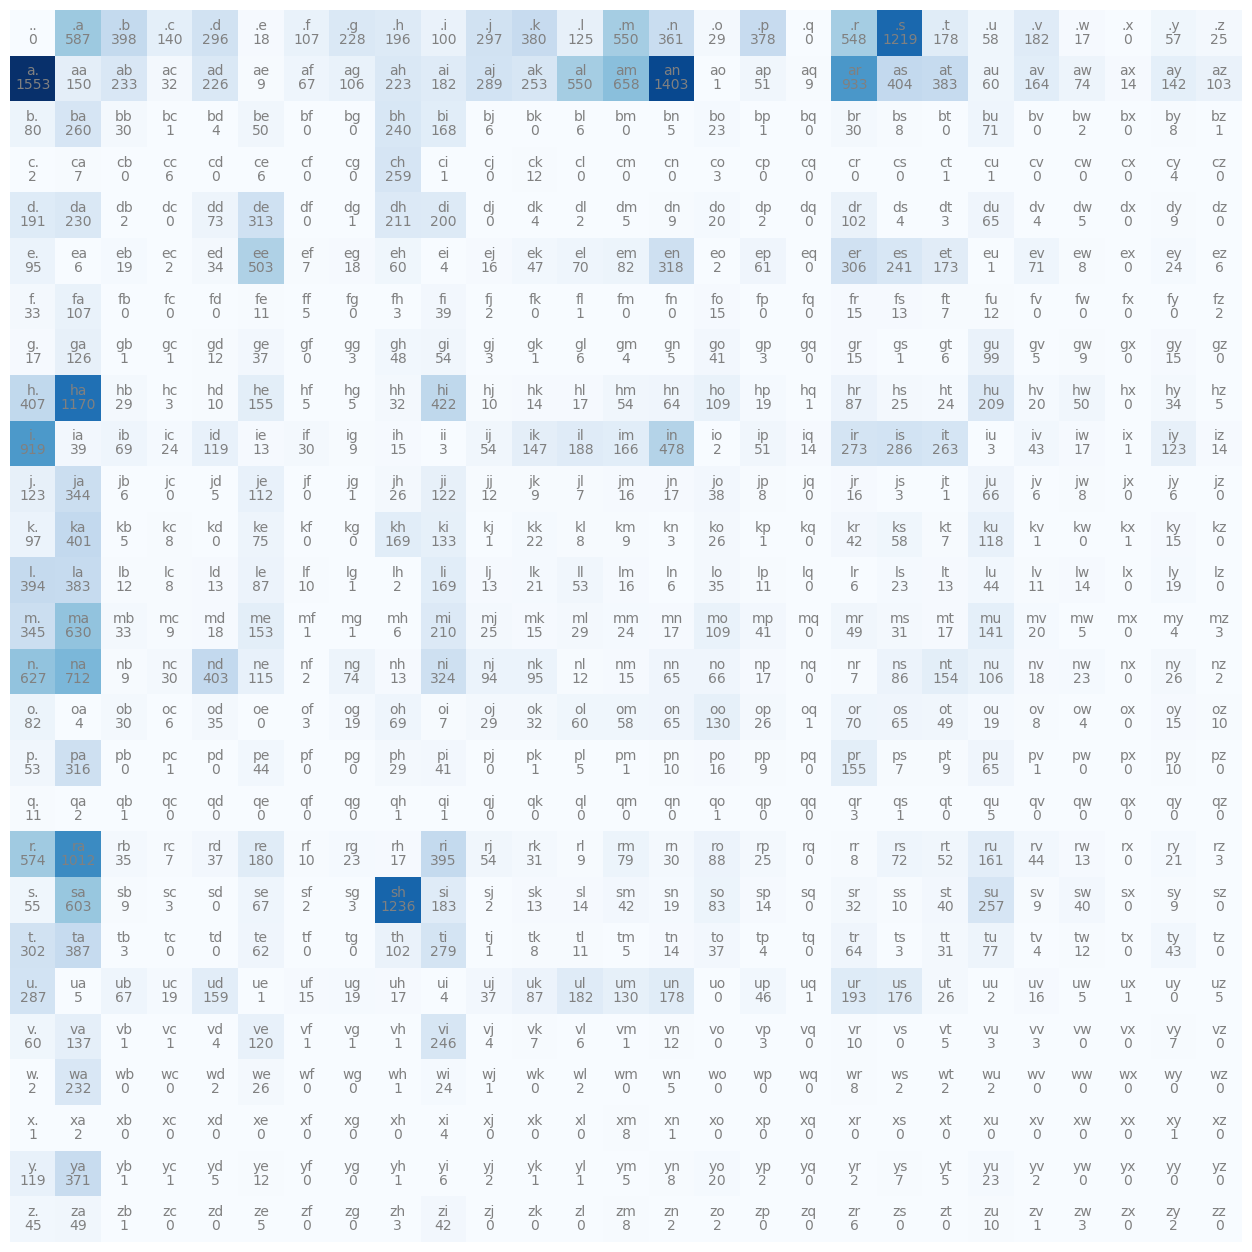

In [67]:
# Visualize the bigram
plt.figure(figsize = (16, 16))
plt.imshow(N, cmap ='Blues')
for i in range(27):
    for j in range(27):
        chtrs = itos[i] + itos[j]
        plt.text(j, i, chtrs, ha = "center", va = "bottom", color = "gray")
        plt.text(j, i, N[i, j].item(), ha = "center", va = "top", color = "gray")
plt.axis('off');

In [83]:
# Probability sampling Demo
g = torch.Generator().manual_seed(700)

p = N[0].float()
p = p / torch.sum(p)
out = torch.multinomial(p, num_samples = 10, replacement = True, generator = g)

[itos[o.item()] for o in out]

['p', 's', 's', 'j', 'b', 'b', 'n', 's', 'j', 'a']

In [151]:
# Probability table
P = (N+1).float()
P /= P.sum(1, keepdim = True)

In [152]:
# Main loop to generate names
ix = 0
names = []
num_names = 20

for i in range(num_names):

    name = ""

    while True:
        # pick the row to draw next from the probability table.
        p = P[ix]
        # sample from this dist
        ix = torch.multinomial(p, num_samples = 1, replacement = True).item()
        # break and save because end of word
        if itos[ix] == '.':
            names.append(name)
            break
        # store characters
        name = name + itos[ix]


names


['shiptiri',
 'rolay',
 'nj',
 'sanashi',
 'f',
 'jesa',
 'ndm',
 'nweerfskara',
 'nk',
 'skhi',
 'mozalevipha',
 'ranamn',
 'preesuhndi',
 'dawha',
 'tila',
 'ngitani',
 'hankhishrmsevipa',
 'l',
 'sura',
 'fitosotyath']

In [144]:
# Loss function

nll = 0.0
log_likelihood = 0.0
n = 0

for w in words:
    # adding start and end
    c = ['.'] + list(w) + ['.']
    # for the entire word
    for c1, c2 in zip(c, c[1:]):
        # convert string to index
        ix1, ix2 = stoi[c1], stoi[c2]
        prob = P[ix1, ix2]
        log_prob = torch.log(prob)
        log_likelihood += log_prob
        #print(itos[ix1], itos[ix2], prob, log_prob)
        n += 1

nll = -log_likelihood / n
nll

tensor(3.8575)

# Neural Network Approach

In [159]:
# Training data creation
xs = []
ys = []

for w in words:
    # adding start and end
    c = ['.'] + list(w) + ['.']
    # for the entire word
    for c1, c2 in zip(c, c[1:]):
        # convert string to index
        ix1, ix2 = stoi[c1], stoi[c2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

# print(xs)
# print("_____________________")
# print(ys)

In [161]:
assert len(xs) == len(ys)
len(xs) 

47617